In [1]:
import cv2
import numpy
import matplotlib.pyplot as plt

# Edge Detection
One of the fundamental operations in image processing. It helps use reduce amount of data to process while maintaining the structural aspect of the image.
1. Sobel Edge Detection (First order detection)
2. Roberts Edge Detection (First order detection)
3. Prewitt Edge Detection (First order detection)
4. Kirsch Edge Detection (First order detection)
5. Nevatia/Babu Edge Detection (First order detection)
6. Laplacian Edge Detection (Second order detection)
7. Canny Edge Detection

- First Order Detection - Very sensitive to noise and produce thicker edges (Maximum Detection).
- Second Order Detection - Less sensitive to noise. (Zero-Crossing Detection)

$$x(t) \longleftrightarrow X(j\omega)$$
$$\frac{d[x(t)]}{dx} \longleftrightarrow j\omega X(j\omega)$$

As we can see, differentiation amplifies noise, smoothening is suggested prior to applying edge detection.

Choosing the optimal edge detection depends on the edge profile of the object to be detected.

## Sobel Edge Detection
A gradient based method, calculating first order derivatives of the image separately for the X and Y axes. It uses two 3x3 kernels which are convolved with the original image to calculate approximations of the derivatives.
$$\text{X kernel} = \begin{bmatrix}-1 & 0 & +1\\-2 & 0 & +2\\-1 & 0 & +1\end{bmatrix}$$

$$\text{Y kernel} = \begin{bmatrix}+1 & +2 & +1\\0 & 0 & 0\\-1 & -2 & -1\end{bmatrix}$$
Edge shown by jump in intensity (1-D image)<img src="../resources/sobel1.jpg">Edge more easy to observe after taking first derivative (maximum)<img src="../resources/sobel2.jpg">
Function: <b>cv2.Sobel(image, depth, dx, dy[, dst[, ksize...]])</b>

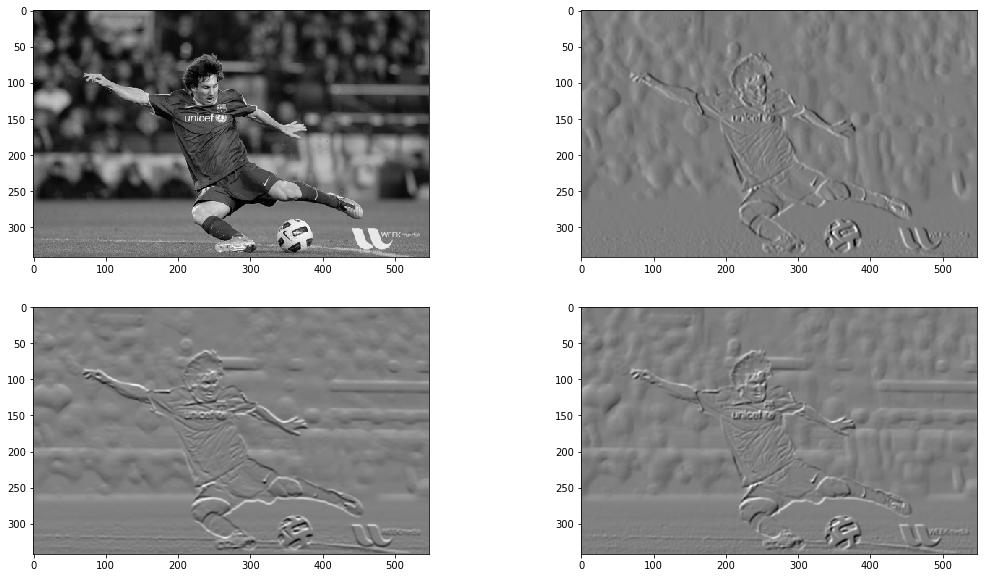

In [8]:
image = cv2.imread('../resources/messi.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

blurred = cv2.GaussianBlur(gray, (3, 3), 0)

sobelx = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=5)
sobely = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=5)

sobel = cv2.addWeighted(sobelx, 0.5, sobely, 0.5, 0)

fig = plt.figure()
fig.set_size_inches(18, 10)

fig.add_subplot(2, 2, 1)
plt.imshow(gray, cmap='gray')

fig.add_subplot(2, 2, 2)
plt.imshow(sobelx, cmap='gray')

fig.add_subplot(2, 2, 3)
plt.imshow(sobely, cmap='gray')

fig.add_subplot(2, 2, 4)
plt.imshow(sobel, cmap='gray')

plt.show()